In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r"train (2).csv")

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
(data.isna().sum()/data.shape[0])*100
data.shape

(8693, 14)

In [6]:
data = data.dropna()
data.shape

(6606, 14)

In [7]:
(data.isna().sum()/data.shape[0])*100

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
Transported     0.0
dtype: float64

In [8]:
X_train = np.array(data[["RoomService","FoodCourt","ShoppingMall","Spa"]])
y_train = np.array(data["Transported"])

regr = linear_model.LogisticRegression()

regr.fit(X_train, y_train)

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_train, data.Transported, test_size=0.30, random_state=42)
target_names= ["No abordó", "Abordó"]
predictions = regr.predict(X_validation)
print(classification_report(Y_validation, predictions,target_names=target_names))
print(confusion_matrix(Y_validation, predictions))

              precision    recall  f1-score   support

   No abordó       0.85      0.52      0.64       975
      Abordó       0.66      0.91      0.77      1007

    accuracy                           0.72      1982
   macro avg       0.75      0.71      0.70      1982
weighted avg       0.75      0.72      0.71      1982

[[505 470]
 [ 90 917]]


In [9]:
X_train = np.array(data[["RoomService","FoodCourt","ShoppingMall","Spa"]])
X_train, X_test, y_train, y_test = train_test_split(X_train, data.Transported, test_size=0.30, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred= clf.predict(X_test)
target_names= ["No Abordó","Abordó"]
print(classification_report(y_test,y_pred,target_names=target_names))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

   No Abordó       0.78      0.64      0.71       975
      Abordó       0.71      0.83      0.76      1007

    accuracy                           0.74      1982
   macro avg       0.74      0.74      0.73      1982
weighted avg       0.74      0.74      0.73      1982

[[626 349]
 [172 835]]


In [10]:
X_train = np.array(data[["RoomService","FoodCourt","ShoppingMall","Spa"]])
y_train = np.array(data["Transported"])
model = GaussianNB()

model.fit(X_train, y_train)


X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_train, y_train, test_size=0.30, random_state=42)

y_pred1 = model.predict(X_validation)

target_names= ["No abordó", "Abordó"]
print(classification_report(Y_validation, y_pred1,target_names=target_names))
print(confusion_matrix(Y_validation, y_pred1))

              precision    recall  f1-score   support

   No abordó       0.89      0.39      0.54       975
      Abordó       0.62      0.95      0.75      1007

    accuracy                           0.68      1982
   macro avg       0.75      0.67      0.65      1982
weighted avg       0.75      0.68      0.65      1982

[[383 592]
 [ 49 958]]


In [11]:
X_train = np.array(data[["RoomService","FoodCourt","ShoppingMall","Spa"]])
y_train = np.array(data["Transported"])
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_train, y_train, test_size=0.30, random_state=42)

ypred= knn.predict(X_validation)

print(classification_report(Y_validation, ypred))
print(confusion_matrix(Y_validation, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.74      0.79       975
        True       0.78      0.88      0.83      1007

    accuracy                           0.81      1982
   macro avg       0.82      0.81      0.81      1982
weighted avg       0.82      0.81      0.81      1982

[[626 349]
 [172 835]]


In [12]:
import joblib

joblib.dump(knn, "knn.joblib")

['knn.joblib']

In [13]:
loaded_model = joblib.load("knn.joblib")

result = accuracy_score(Y_validation, loaded_model.predict(X_test))
print(result)

0.8113017154389506


In [14]:
data_test = pd.read_csv(r"C:\Users\Andrés Arango\Downloads\test (2).csv")
(data_test.isna().sum()/data_test.shape[0])*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

In [15]:
data_test.shape

(4277, 13)

In [16]:
data_test["RoomService"]=data_test["RoomService"].fillna(value=0)
data_test["FoodCourt"]=data_test["FoodCourt"].fillna(value=0)
data_test["ShoppingMall"]=data_test["ShoppingMall"].fillna(value=0)
data_test["Spa"]=data_test["Spa"].fillna(value=0)

In [17]:
(data_test.isna().sum()/data_test.shape[0])*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          1.870470
Name            2.197802
dtype: float64

In [18]:
y = np.array(data["Transported"])
features =["RoomService","FoodCourt","ShoppingMall","Spa"]

X = pd.get_dummies(data[features])
X_test = pd.get_dummies(data_test[features])

knn = KNeighborsClassifier()

knn.fit(X,y)

predictions = knn.predict(X_test)

output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Transported': predictions})
output.to_csv('submission2.csv', index=False)

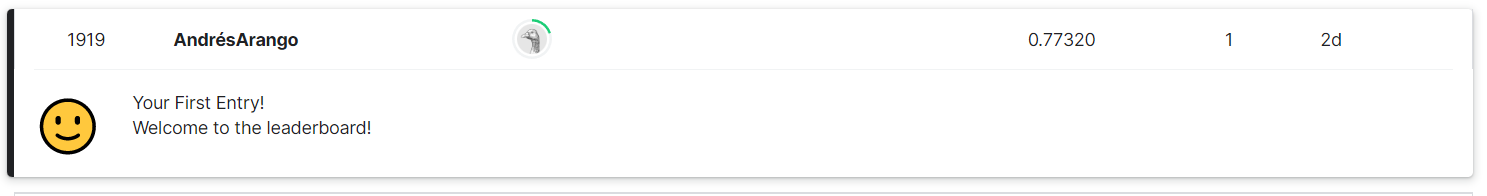

#### Registro del método en kaggle